# Social Media Sentiments Analysis

Social media analysis is to understand audience, develop creative contents, increase traffic and sales, boost ROI, and improve strategic decision-making to achieve social media goals. Audience analysis helps improving customer experience, brand perception, and marketing strategy. Meanwhile, sentiment analysis is to find out how audience feel about your brand on social media via engagement activities such as likes, follows, clicks, retweets, comments, impressions, interests, and behaviours, etc. These metrics help marketing campains and measuring key performance indicators(KPIs). 

# About the dataset

The dataset captures audience emotions, trends, and interactions across different social media platform; Instagram, Facebook, Tweeter. It provides a snapshot of user generated content, encompassing text, timestamps, hashtags, countries, likes and retweets. It can be leveraged for diverse analytical purposes such as sentiment analysis, temporal analysis, user behaviour insights, platform specific analysis, hashtag trends, geographical analysis, user identification, and cross-analysis.

[Data Source](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset)

* Text: User-generated content showcasing sentiments
* Sentiment: Categorized emotions
* Timestamp: Date and time information
* User: Unique identifiers of users contributing
* Platform: Social media platform where the content originated
* Hashtags: Identifies trending topics and themes
* Likes: Quantities user engagement
* Retweets: Reflects content popularity
* Country: Geographical origin of each post

# Identify objective

* Understand data to interpret insights about how customer feel on social media
* Analyze and visualize audience sentiments to improve audience experience
* Deliver strategic marketing metrics to achieve socal media goals

# 1. Import libaries and Load data

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# 2. Preprocessing: Inspect and Clean Data

In [3]:
print('Columns of dataset: ', df.columns, '\n')
print('Dimension of dataset: ', df.shape, '\n')
print('Infomation of dataset: ', df.info())

Columns of dataset:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object') 

Dimension of dataset:  (732, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null

In [4]:
df.isnull().sum() #<--- null value: none

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [5]:
df.duplicated().sum() #<---duplicates: none

0

# 3. Preprocessing: Wrangle and Transform data

In [6]:
# Drop unrelevant and unclear no-name columns from the dataset
df1=df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [7]:
# check statistical distribution of numerical variables
df1.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
# Check object columns: count of all values in the column, unique value, top value, frequency of value
df1.describe(include=['object'])

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2022-07-17 06:15:00,WindWhisperer,Instagram,#Compassionate #TearsOfEmpathy,USA
freq,3,44,3,3,258,3,59


**pandas.Series.str.strip()**

Strip whitespaces (including newlines) or a set of specified characters from each string in the Series/Index from left and right sides. Replaces any non-strings in Series with NaNs.

Example: 
- Before using str.strip(): ' Twitter  ', ' Twitter ', ' Instagram ', ' Facebook '
- After using str.strip(): 'Twitter', 'Instagram', 'Facebook'


In [9]:
# Series.str.strip() in pandas: Remove leading and trailing characters in Series/Index.
df1['Text']= df1['Text'].str.strip()
df1['Sentiment']= df1['Sentiment'].str.strip()
df1['User']= df1['User'].str.strip()
df1['Platform']= df1['Platform'].str.strip()
df1['Hashtags']= df1['Hashtags'].str.strip()
df1['Country']= df1['Country'].str.strip()

In [10]:
# to see unique values in 'Platform' column
print("Print unique values in 'Platform'column: ", df1['Platform'].unique(), '\n')
print("Value counts in 'Platform' column: ", '\n', df1['Platform'].value_counts())

Print unique values in 'Platform'column:  ['Twitter' 'Instagram' 'Facebook'] 

Value counts in 'Platform' column:  
 Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


In [11]:
df1.sample(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
6,Rainy days call for cozy blankets and hot cocoa.,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
139,Serenity found in the melody of a peaceful piano.,Serenity,2016-07-30 18:10:00,MusicLover4,Twitter,#Serenity #PeacefulMelody,18.0,35.0,Canada,2016,7,30,18
545,Cheering for the underdog in the basketball fi...,Triumph,2022-06-20 21:00:00,BasketballFanUnderdogTriumph,Facebook,#Triumph #BasketballFinals,18.0,35.0,USA,2022,6,20,21


In [12]:
# Transform the 'Timestamp' column to two columns, 'Date', 'Time'
import datetime as dt
df1['time'] = pd.to_datetime(df1.Timestamp)
df1['Date'] = df1['time'].dt.date
df1['Time'] = df1['time'].dt.time
#df1['new_Day']=df1['time'].dt.day
df1['Weekday']=df1['time'].dt.weekday  #<--- weekday value: 0 ~ 6
#df1.drop(['Timestamp', 'time'], axis=1) #<--- not working in here
df1.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15 12:30:00,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15 08:45:00,2023-01-15,08:45:00,6


In [13]:
# drop two columns: 'timestamp', 'time'
df2=df1.drop(['Timestamp', 'time'], axis=1)
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6


In [14]:
# Transform name of the column and create new column 'Month_name' using replace() function
df2['Monthname']=df2['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df2['Weekdayname']=df2['Weekday'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday,Monthname,Weekdayname
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6,Jan,Sun
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6,Jan,Sun


In [15]:
df2.drop('Weekday', axis=1).sample(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Monthname,Weekdayname
31,Enjoying a cup of tea and watching the sunset.,Positive,SunsetWatcher,Twitter,#TeaTime #Sunset,15.0,30.0,India,2023,1,25,18,2023-01-25,18:00:00,Jan,Wed
210,"Melancholy whispers in the breeze, a silent co...",Melancholy,DreamerInSilence,Facebook,#Melancholy #WhispersInTheBreeze,12.0,25.0,India,2020,3,1,19,2020-03-01,19:00:00,Mar,Sun


In [16]:
# Check the value of columns: 'Monthname', 'Weekdayname'using np.unique()
print('Name of value in the Monthname column:', df2.Monthname.unique())
print('Name of value in the Weekdayname column: ', df2.Weekdayname.unique())

Name of value in the Monthname column: ['Jan' 'Feb' 'Mar' 'May' 'Aug' 'Jun' 'Nov' 'Apr' 'Sep' 'Jul' 'Oct' 'Dec']
Name of value in the Weekdayname column:  ['Sun' 'Mon' 'Tue' 'Wed' 'Thur' 'Fri' 'Sat']


# 4. Analyze and visualize data

Text(0.5, 1.0, 'Kinds of Sentiment in descending order')

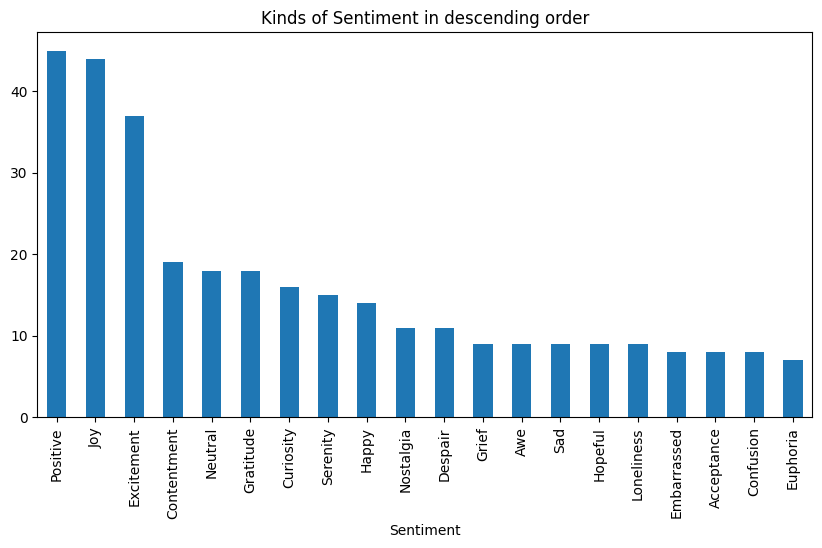

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df2['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Kinds of Sentiment in descending order")

Text(0.5, 1.0, 'Proportion of Platform')

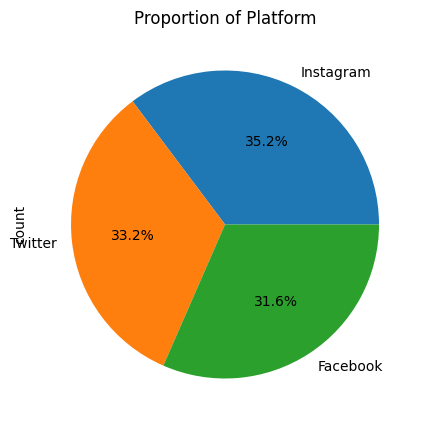

In [18]:
#
plt.figure(figsize=(10, 5))
df2['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Platform")
#plt.legend()

<Axes: xlabel='Country'>

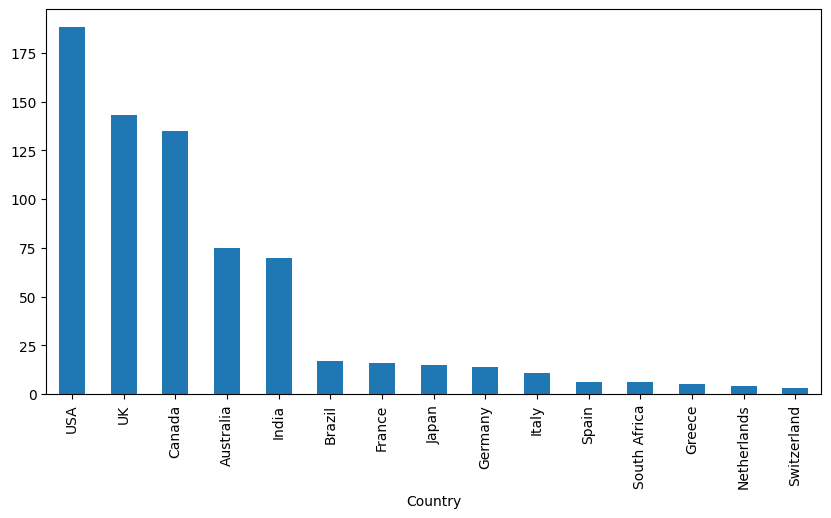

In [19]:
#
plt.figure(figsize=(10, 5))
df2['Country'].value_counts().nlargest(15).plot(kind='bar')

In [20]:
for column in df2[['Year', 'Likes', 'Retweets']]:
    print(f"Maxiumn value: {column}:{df2[column].max()} | Minimum value: {column}:{df2[column].min()}")

Maxiumn value: Year:2023 | Minimum value: Year:2010
Maxiumn value: Likes:80.0 | Minimum value: Likes:10.0
Maxiumn value: Retweets:40.0 | Minimum value: Retweets:5.0


<Axes: xlabel='Country'>

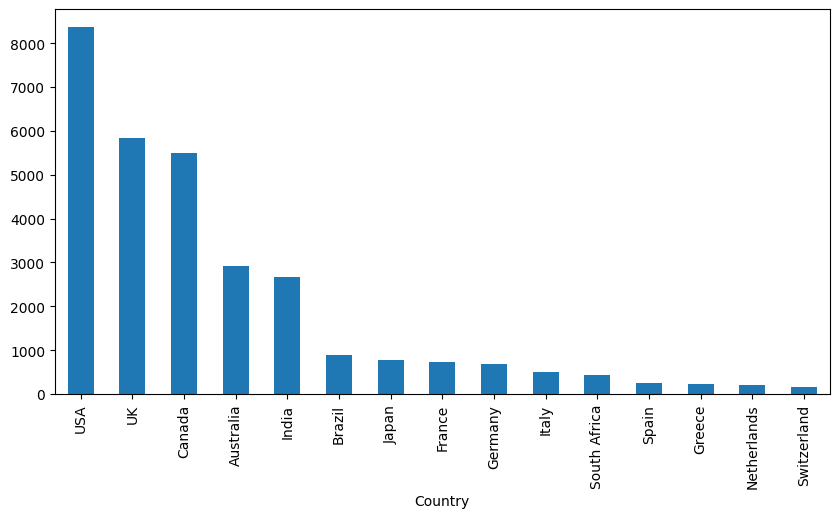

In [21]:
#
plt.figure(figsize=(10, 5))
df2.groupby('Country')['Likes'].sum().nlargest(15).plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '#Wonder #StargazingAdventure'),
  Text(1, 0, '#Playful #CarnivalEscapade'),
  Text(2, 0, '#Harmony #MusicalUnity'),
  Text(3, 0, '#Proud #ScalingPeaks'),
  Text(4, 0, '#Compassionate #TearsOfEmpathy'),
  Text(5, 0, '#Coziness #WarmWinterEvening'),
  Text(6, 0, '#Inspiration #ForestWhispers'),
  Text(7, 0, '#Playful #JugglingResponsibilities'),
  Text(8, 0, '#Radiance #SpringBlooms'),
  Text(9, 0, '#TimelessTunes #SeniorJazz')])

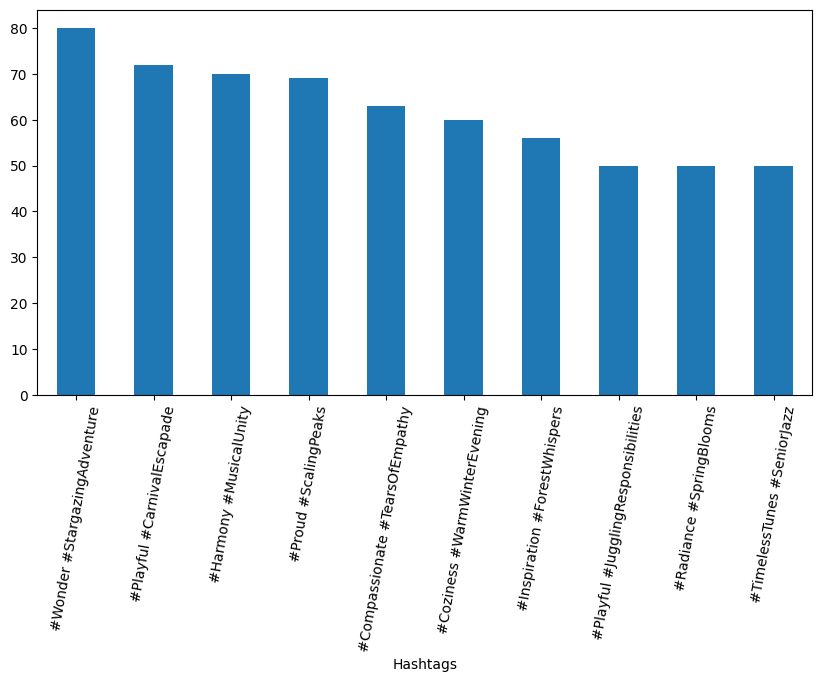

In [22]:
#
plt.figure(figsize=(10, 5))
df3=df2.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False)
df3.plot(kind='bar')
plt.xticks(rotation=80)
#control test angle

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Accumulative 'Likes' over years on Twitter")

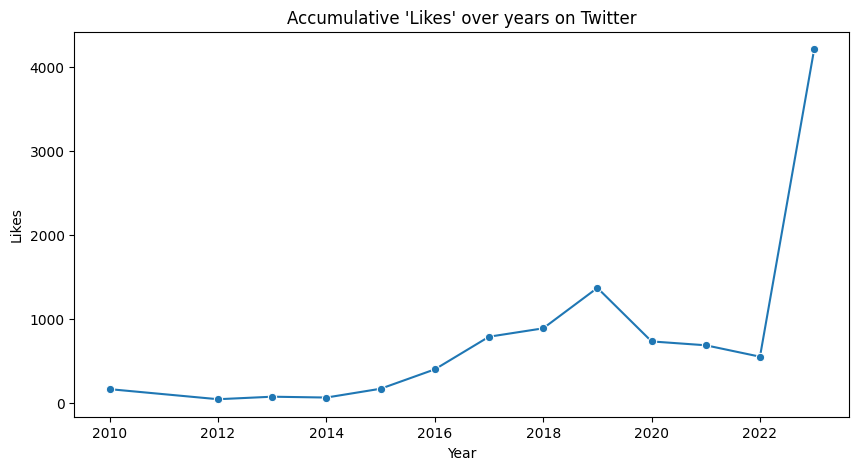

In [23]:
# Create variable 'Twitter' 
Twitter=df2[df2['Platform']=='Twitter']
df5=Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=df5, x='Year', y='Likes', marker='o')
plt.title("Accumulative 'Likes' over years on Twitter")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Accumulative 'Retweets' over time on Instagram")

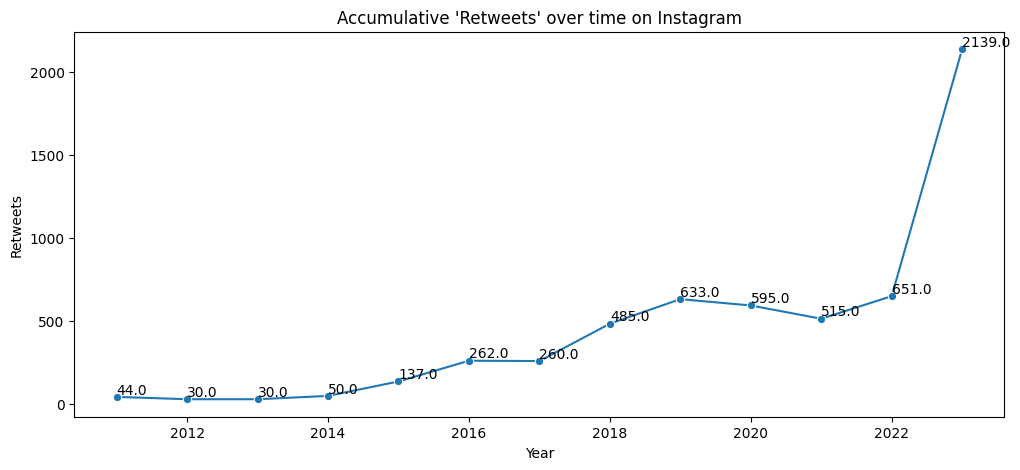

In [24]:
# iterrows(): iterate over DataFrame rows as (index, Series) pairs.
Instagram=df2[df2['Platform']=='Instagram']
df_ins=Instagram.groupby('Year')['Retweets'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_ins, x='Year', y='Retweets', marker='o')
for index, value in df_ins.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')
plt.title("Accumulative 'Retweets' over time on Instagram")